In [156]:
import pandas as pd
import numpy as np
import seaborn as sns

from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
import dython as dy # for nominal categorical data
from dython.nominal import associations 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import os 
import taxi_survey 
from imp import reload
reload(taxi_survey)
from taxi_survey import *
from mord import LogisticIT
from mord import OrdinalRidge
from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel
from pandas.api.types import CategoricalDtype
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

In [299]:
df_raw = pd.read_excel("Electric Taxis in South Africa(1-5000).xlsx")
df_raw = df_raw.append(pd.read_excel('Electric Taxis in South Africa(5001-5703).xlsx'))
df = df_raw.copy()
df.drop(df.columns[0:7], axis = 1, inplace = True)
df
driver_owner_user = df['Please select the option that applies to you:']
demographics = df.columns[0:6]
education = df.columns[6:10]
driver_owner_user = df['Please select the option that applies to you:'] # Question 10 
driver_questions=  df.columns[11:22]
owner_questions = df.columns[22:35]
owner_driver_questions = df.columns[35:47]
demographics = df.columns[0:6]
province_or_country = df[demographics[0]]
city_or_rural = df[demographics[1]]
which_area_now = df[demographics[2]]
language = df[demographics[3]]
age = df[demographics[4]]
gender = df[demographics[5]]
education = df.columns[6:10]
highest_lvl_schooling = df[education[0]]
any_tertiary = df[education[1]]
any_education_after_school = df[education[2]]
highest_lvl_tertiary = df[education[3]]
driver_questions=  df.columns[11:22]
driver_how_long_driving = df[driver_questions[0]]
driver_how_many_days_per_week_driving = df[driver_questions[1]]
driver_what_days_drive = df[driver_questions[2]]
driver_hours_drive_per_weekday = df[driver_questions[3]]
driver_km_per_weekday = df[driver_questions[4]]
driver_hours_drive_per_weekend = df[driver_questions[5]]
driver_income_per_day = df[driver_questions[6]]
driver_knows_what_e_taxi_is = df[driver_questions[7]]
driver_e_taxi_benefit_vs_ICE = df[driver_questions[8]]
driver_e_taxi_risks_vs_ICE = df[driver_questions[9]]
driver_e_taxi_better_than_ICE = df[driver_questions[10]]
owner_questions = df.columns[22:35]
owner_num_taxis = df[owner_questions[0]]
owner_how_long_owned_taxi = df[owner_questions[1]]
owner_petrol_or_diesel = df[owner_questions[2]]
owner_how_old_oldest_vehicle = df[owner_questions[3]]
owner_how_old_average_vehicle = df[owner_questions[4]]
owner_km_per_day = df[owner_questions[5]]
owner_income_per_week = df[owner_questions[6]]
owner_e_taxi_benefit_vs_ICE = df[owner_questions[7]]
owner_e_taxi_risks_vs_ICE = df[owner_questions[8]]
owner_e_taxi_better_than_ICE = df[owner_questions[9]]
owner_which_costs_more_to_run_ICE_or_etaxi = df[owner_questions[10]]
owner_which_costs_more_to_buy_ICE_or_etaxi = df[owner_questions[11]]
owner_which_costs_more_to_service_ICE_or_etaxi = df[owner_questions[12]]
owner_driver_questions = df.columns[35:55]
owner_driver_num_taxis = df[owner_driver_questions[0]]
owner_driver_how_long_owned_taxi = df[owner_driver_questions[1]]
owner_driver_petrol_or_diesel = df[owner_driver_questions[2]]
owner_driver_how_old_oldest_vehicle = df[owner_driver_questions[3]]
owner_driver_how_old_average_vehicle = df[owner_driver_questions[4]]
owner_driver_how_far_per_day = df[owner_driver_questions[5]]
owner_driver_how_long_driven_taxi = df[owner_driver_questions[6]]
owner_driver_number_days_per_week = df[owner_driver_questions[7]]
owner_driver_what_days_drive = df[owner_driver_questions[8]]
owner_driver_hours_drive_per_weekday = df[owner_driver_questions[9]]
owner_driver_km_per_weekday_belief = df[owner_driver_questions[10]]
owner_driver_hours_drive_per_weekend = df[owner_driver_questions[11]]
owner_driver_income_per_week = df[owner_driver_questions[12]]
owner_driver_e_taxi_benefit_vs_ICE = df[owner_driver_questions[13]]
owner_driver_e_taxi_risks_vs_ICE = df[owner_driver_questions[14]]
owner_driver_e_taxi_better_than_ICE = df[owner_driver_questions[15]]
owner_driver_e_taxi_will_be_better_than_ICE = df[owner_driver_questions[16]]
owner_driver_which_costs_more_to_run_ICE_or_etaxi = df[owner_driver_questions[17]]
owner_driver_which_costs_more_to_buy_ICE_or_etaxi = df[owner_driver_questions[18]]
owner_driver_which_costs_more_to_service_ICE_or_etaxi = df[owner_driver_questions[19]]
user_questions = df.columns[70:81]
user_how_long = user_questions[0]
user_how_many_days_per_week = user_questions[1]
user_what_days = user_questions[2]
user_how_far_normal_trip = user_questions[3]
user_avg_trip_cost = user_questions[4]
user_ICE_taxis_too_expensive = user_questions[5]
user_knows_what_e_taxi_is = user_questions[6]
owner_driver_e_taxi_benefit = user_questions[7]
owner_driver_e_taxi_risks = user_questions[8]
owner_environmental_conscience = user_questions[9]
user_price_vs_time_prefs = user_questions[10]
perceptions_of_ICE_taxi = df.columns[55:60]
ICE_taxi_safe = df[perceptions_of_ICE_taxi[0]]
ICE_taxi_reliable = df[perceptions_of_ICE_taxi[1]]
ICE_taxi_fuel_expensive = df[perceptions_of_ICE_taxi[2]]
ICE_taxi_purchase_expensive = df[perceptions_of_ICE_taxi[3]]
ICE_taxi_service_expensive = df[perceptions_of_ICE_taxi[4]]
perceptions_of_EV_taxi = df.columns[60:70]
EV_taxi_range = df[perceptions_of_EV_taxi[0]]
EV_taxi_charge_time = df[perceptions_of_EV_taxi[1]]
EV_taxi_purchase_decision = df[perceptions_of_EV_taxi[2]]
EV_taxi_purchase_price_threshold = df[perceptions_of_EV_taxi[3]]
EV_taxi_should_happen = df[perceptions_of_EV_taxi[4]]
EV_taxi_worried_about_stations = df[perceptions_of_EV_taxi[5]]
EV_taxi_affected_by_loadshedding = df[perceptions_of_EV_taxi[6]]
EV_taxi_charging_expensive = df[perceptions_of_EV_taxi[7]]
EV_taxi_purchase_expensive = df[perceptions_of_EV_taxi[8]]
EV_taxi_service_expensive = df[perceptions_of_EV_taxi[9]]
climate_change = df.columns[84:89]
climate_concern = df[climate_change[0]]
climate_taxis_should_reduce_env_impact = df[climate_change[1]]
climate_ICE_taxis_harm_environment = df[climate_change[2]]
climate_EV_taxis_help_environment = df[climate_change[3]]
climate_govt_should_switch_to_ev = df[climate_change[4]]
personal_characteristics = df.columns[89:92]
personal_risk_taker = df[personal_characteristics[0]]
peronsal_trust_people = df[personal_characteristics[1]]
personal_trust_tech = df[personal_characteristics[2]]

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_13613/1222642071.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw = df_raw.append(pd.read_excel('Electric Taxis in South Africa(5001-5703).xlsx'))


# Exploring perceptions related to EVs
Perception of benefits vs perception of risks <br>
Perception of risks vs risk profile <br>
Concern for climate change vs. perception of benefits <br>
Effect of 'age','income', 'education' on 'having an electric taxi would benefit your business', 'which one would cost more to run', 'which one would cost more to buy', 'which one would have more service costs', and 'concern for climate change' <br>


Define 'perceptions' target variables 

In [159]:
driver_perceptions = driver_questions[8:11]
print(driver_perceptions)
owner_perceptions = owner_questions[-6:]
print(owner_perceptions)
owner_driver_perceptions = owner_driver_questions[-7:]
print(owner_driver_perceptions)

Index(['How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)',
       'What risks would an electric taxi inroduce to your operations compared to petrol/diesel taxis? (select all that apply)',
       'Driving an electric taxi would be better for you than driving a petrol/diesel taxi'],
      dtype='object')
Index(['How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)2',
       'What risks would an electric taxi inroduce to your operations compared to a petrol/diesel taxi? (select all that apply)',
       'Having an electric taxi would benefit your business.',
       'Which one would cost more to run the taxi per day?',
       'Which one would cost more to buy?',
       'Which one would have more service costs?'],
      dtype='object')
Index(['How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)3',
       'What risks would

Create various indeces for categorical variables

In [ ]:
df['education_index'] = df[education[0]].map({'No Schooling': 1, 'Grade 2 (previously Sub A / class 2)': 2, 'Grade 3 (Std. 1)': 3, 'Grade 4 (Std. 2)': 4,
                                                  'Grade 5 (Std. 3)': 5, 'Grade 6 (Std. 4)': 6, 'Grade 7 (Std. 5)': 7, 'Grade 8 (Std. 6 / Form 1)': 8,
                                                  'Grade 9 (Std. 7 / Form 2)': 9, 'Grade 10 (Std. 8 / Form 3)': 10, 'Grade 11 (Std. 9 / Form 4)': 11,
                                                 'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)': 12})

# risk, stated preferences, etc.

### Driver vs. Owner vs. User perceptions of benefits and risks

Benefits

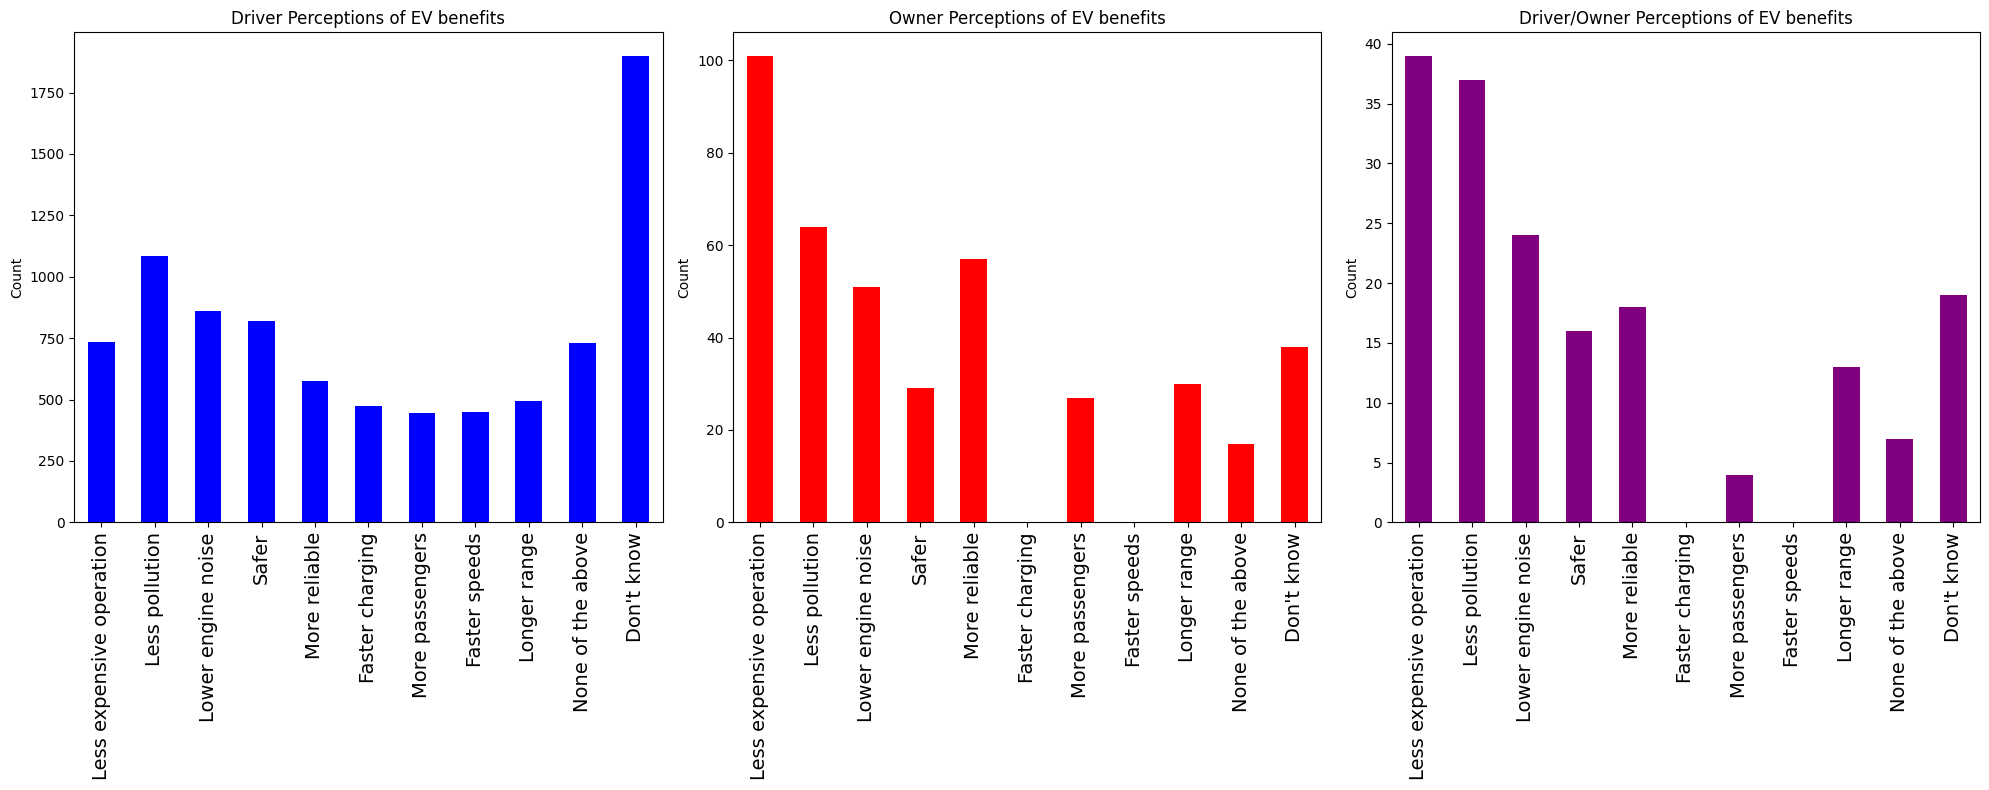

In [361]:
perceptions = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging an electric taxi than filling up a petrol/diesel taxi', 'More passengers', 'Faster speeds with', 'Longer range', "None of the above", "Don't know"]
perceptions_index = ['Less expensive operation', 'Less pollution', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging', 'More passengers', 'Faster speeds', 'Longer range', "None of the above", "Don't know"]

# Driver perceptions
df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
exploded_df_driver = df.explode('driver_benefits_of_etaxi_exploded')
exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_benefits_of_etaxi_exploded'].notnull())]

# Owner perceptions 
df['owner_benefits_of_etaxi_exploded'] = df[owner_perceptions[0]].str.split(';')
exploded_df_owner = df.explode('owner_benefits_of_etaxi_exploded')
exploded_df_owner = exploded_df_owner[(exploded_df_owner['owner_benefits_of_etaxi_exploded'] != '') & (exploded_df_owner['owner_benefits_of_etaxi_exploded'].notnull())]

# Driver + Owner perceptions 
df['owner_driver_benefits_of_etaxi_exploded'] = df[owner_driver_perceptions[0]].str.split(';')
exploded_df_owner_driver = df.explode('owner_driver_benefits_of_etaxi_exploded')
exploded_df_owner_driver = exploded_df_owner_driver[(exploded_df_owner_driver['owner_driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_owner_driver['owner_driver_benefits_of_etaxi_exploded'].notnull())]

fig, axs = plt.subplots(1, 3, figsize = (20, 8))
fig.subplots_adjust(wspace = 0.3)
#PLOTTING
x_font_size = 14 #
ax=exploded_df_driver['driver_benefits_of_etaxi_exploded'].value_counts().reindex(perceptions).plot(kind='bar', stacked=True, ax=axs[0], title='Driver Perceptions of EV benefits', color = 'blue', ylabel = 'Count')
ax.set_xticklabels(perceptions_index, fontsize = x_font_size)

ax=exploded_df_owner['owner_benefits_of_etaxi_exploded'].value_counts().reindex(perceptions).plot(kind='bar', stacked=True, ax=axs[1], title='Owner Perceptions of EV benefits', color = 'red', ylabel = 'Count')
ax.set_xticklabels(perceptions_index, fontsize = x_font_size)

ax=exploded_df_owner_driver['owner_driver_benefits_of_etaxi_exploded'].value_counts().reindex(perceptions).plot(kind='bar', stacked=True, ax=axs[2], title='Driver/Owner Perceptions of EV benefits', color = 'purple', ylabel = 'Count')
ax.set_xticklabels(perceptions_index, fontsize = x_font_size)

plt.tight_layout()
plt.savefig('figures/dou_ev_benefits_perceptions_comparison.png')
plt.show()

Risks

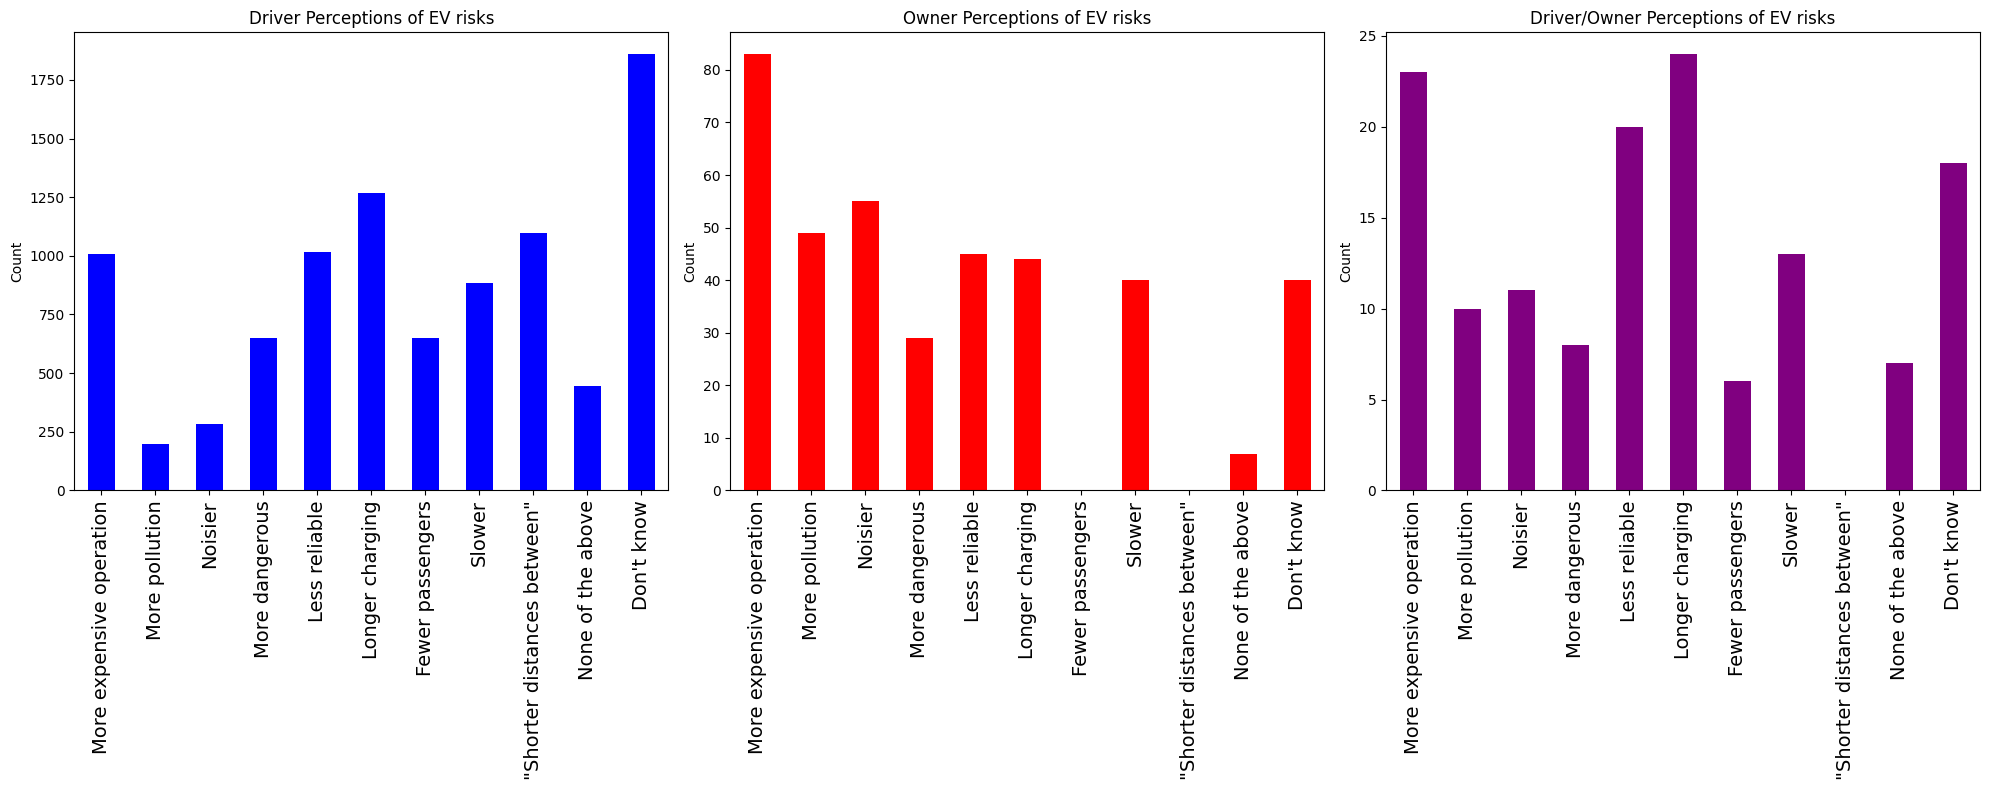

In [365]:


perceptions_risks = ['More expensive to operate','More pollution and emissions','More noisy', 'More dangerious', 'Less reliable', 'Longer periods of charging an electric taxi than filling with diesel/petrol', 'Fewer passengers','Slower speeds',  'Shorter distances between',   'None of the above', "Don't know"]
perceptions_risks_index = ['More expensive operation', 'More pollution', 'Noisier', 'More dangerous', 'Less reliable','Longer charging', 'Fewer passengers', 'Slower', '"Shorter distances between"', 'None of the above', "Don't know"]


# Driver perceptions
df['driver_risks_of_etaxi_exploded'] = df[driver_perceptions[1]].str.split(';')
exploded_df_driver = df.explode('driver_risks_of_etaxi_exploded')
exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_risks_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_risks_of_etaxi_exploded'].notnull())]

# Owner perceptions 
df['owner_risks_of_etaxi_exploded'] = df[owner_perceptions[1]].str.split(';')
exploded_df_owner = df.explode('owner_risks_of_etaxi_exploded')
exploded_df_owner = exploded_df_owner[(exploded_df_owner['owner_risks_of_etaxi_exploded'] != '') & (exploded_df_owner['owner_risks_of_etaxi_exploded'].notnull())]

# Driver + Owner perceptions 
df['owner_driver_risks_of_etaxi_exploded'] = df[owner_driver_perceptions[1]].str.split(';')
exploded_df_owner_driver = df.explode('owner_driver_risks_of_etaxi_exploded')
exploded_df_owner_driver = exploded_df_owner_driver[(exploded_df_owner_driver['owner_driver_risks_of_etaxi_exploded'] != '') & (exploded_df_owner_driver['owner_driver_risks_of_etaxi_exploded'].notnull())]

fig, axs = plt.subplots(1, 3, figsize = (20, 8))
fig.subplots_adjust(wspace = 0.3)
# PLOTTING 
x_font_size = 14

ax = exploded_df_driver['driver_risks_of_etaxi_exploded'].value_counts().reindex(perceptions_risks).plot(kind='bar', stacked=True, ax=axs[0], title='Driver Perceptions of EV risks', color = 'blue', ylabel = 'Count')
ax.set_xticklabels(perceptions_risks_index, fontsize = x_font_size)

ax = exploded_df_owner['owner_risks_of_etaxi_exploded'].value_counts().reindex(perceptions_risks).plot(kind='bar', stacked=True, ax=axs[1], title='Owner Perceptions of EV risks', color = 'red', ylabel = 'Count')
ax.set_xticklabels(perceptions_risks_index, fontsize = x_font_size)

ax = exploded_df_owner_driver['owner_driver_risks_of_etaxi_exploded'].value_counts().reindex(perceptions_risks).plot(kind='bar', stacked=True, ax=axs[2], title='Driver/Owner Perceptions of EV risks', color = 'purple', ylabel = 'Count')
ax.set_xticklabels(perceptions_risks_index, fontsize = x_font_size)

plt.tight_layout()
plt.savefig('figures/dou_ev_risks_perceptions_comparison.png')
plt.show()

In [363]:
exploded_df_owner_driver['owner_driver_risks_of_etaxi_exploded'].value_counts()

More expensive to buy                                                          56
More expensive to service                                                      44
Longer periods of charging an electric taxi than filling with diesel/petrol    24
More expensive to operate                                                      23
Shorter distances between charging                                             23
Less reliable                                                                  20
Don't know                                                                     18
Slower speeds                                                                  13
More noisy                                                                     11
More pollution and emissions                                                   10
More dangerious                                                                 8
None of the above                                                               7
Fewer passengers

### Stated Preferences

In [ ]:
driver_is_it_better = df[driver_questions[-1]].value_counts(normalize=True)
owner_is_it_better = df[owner_questions[-4]].value_counts(normalize=True)
owner_driver_is_it_better = df[owner_driver_questions[-4]].value_counts(normalize=True)

driver_is_it_better.index = driver_is_it_better.index.str.lower()
owner_is_it_better.index = owner_is_it_better.index.str.lower()
owner_driver_is_it_better.index = owner_driver_is_it_better.index.str.lower()

colors = ['green', 'blue', 'yellow', 'orange', 'red', 'black']

reload(taxi_survey) 
taxi_survey.plot_pref_ev_comparison_among_groups(driver_is_it_better, owner_is_it_better, owner_driver_is_it_better, colors)


### Knowledge of e-taxi vs. perceptions of e-taxi benefits and risk and stated prefs

In [ ]:
# Look at % who answered MORE correct than incorrect answers (have to index the answers correct and incorrect, and rhen binary indicator for if correct countn€min correct count)

# after do the KM grouped bar plot lol

# Look at % who answered MORE correct than incorrect answers (have to index the answers correct and incorrect, and rhen binary indicator for if correct countn€min correct count)

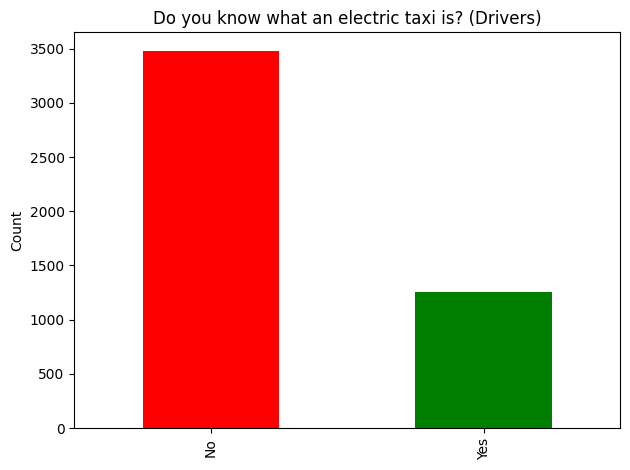

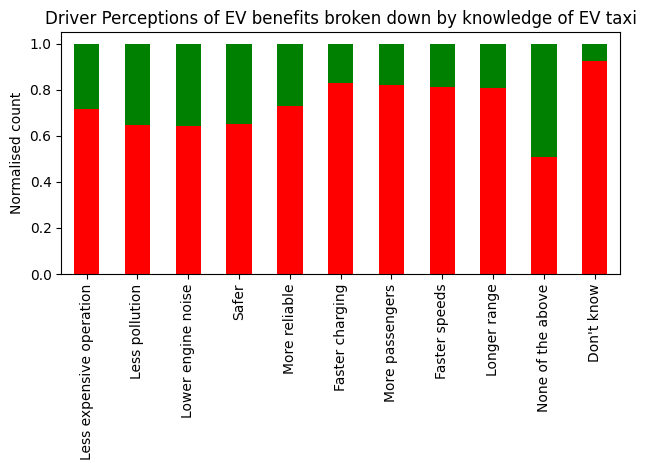

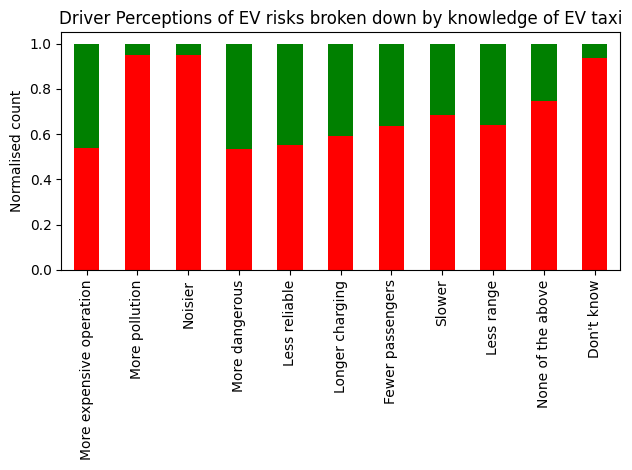

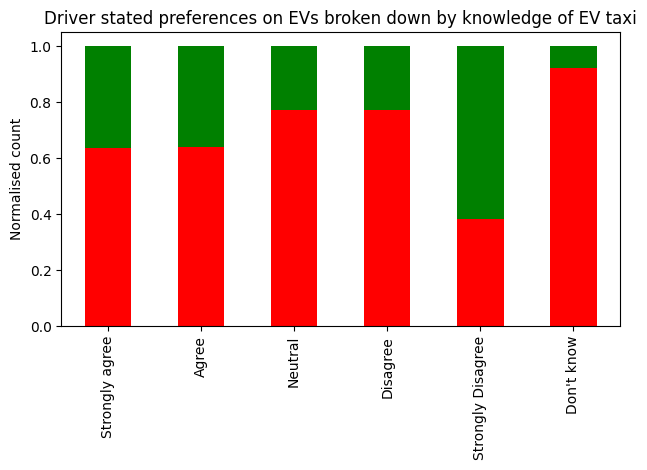

In [185]:
# 'do you know what an electric taxi is' for drivers
df[driver_questions[-4]].value_counts().plot(kind = 'bar', stacked = True, color = ['red', 'green'], ylabel = 'Count', title = 'Do you know what an electric taxi is? (Drivers)')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("figures/driver_knowledge_of_etaxi.png")
plt.show()

perceptions = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging an electric taxi than filling up a petrol/diesel taxi', 'More passengers', 'Faster speeds with', 'Longer range', "None of the above", "Don't know"]
perceptions_index = ['Less expensive operation', 'Less pollution', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging', 'More passengers', 'Faster speeds', 'Longer range', "None of the above", "Don't know"]

perceptions_risks = ['More expensive to operate','More pollution and emissions','More noisy', 'More dangerious', 'Less reliable', 'Longer periods of charging an electric taxi than filling with diesel/petrol', 'Fewer passengers','Slower speeds',  'Shorter distances between',   'None of the above', "Don't know"]
perceptions_risks_index = ['More expensive operation', 'More pollution', 'Noisier', 'More dangerous', 'Less reliable','Longer charging', 'Fewer passengers', 'Slower', 'Less range', 'None of the above', "Don't know"]


# BENEFITS
df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
exploded_df_driver_benefits = df.explode('driver_benefits_of_etaxi_exploded', driver_questions[-4])
exploded_df_driver_benefits = exploded_df_driver_benefits[(exploded_df_driver_benefits['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver_benefits['driver_benefits_of_etaxi_exploded'].notnull())]
pd.crosstab(exploded_df_driver_benefits['driver_benefits_of_etaxi_exploded'], exploded_df_driver_benefits[driver_questions[-4]], normalize = 'index').reindex(perceptions).plot(kind = 'bar', legend = False,stacked = True, color = ['red', 'green'], ylabel = 'Count', title = 'Driver Perceptions of EV benefits broken down by knowledge of EV taxi')
plt.xlabel('')
plt.xticks(range(len(perceptions_index)), perceptions_index, rotation=90) # set the x-tick labels to the items in the perceptions list
plt.tight_layout()
plt.ylabel('Normalised count')
plt.savefig("figures/drivers_knowledge_of_e_taxi_by_benefits.png")
plt.show()

# RISKS
df['driver_risks_of_etaxi_exploded'] = df[driver_perceptions[1]].str.split(';')
exploded_df_driver_risks = df.explode('driver_risks_of_etaxi_exploded', driver_questions[-4])
exploded_df_driver_risks = exploded_df_driver_risks[(exploded_df_driver_risks['driver_risks_of_etaxi_exploded'] != '') & (exploded_df_driver_risks['driver_risks_of_etaxi_exploded'].notnull())]
pd.crosstab(exploded_df_driver_risks['driver_risks_of_etaxi_exploded'], exploded_df_driver_risks[driver_questions[-4]], normalize = 'index').reindex(perceptions_risks).plot(kind = 'bar', legend = False,stacked = True, color = ['red', 'green'], ylabel = 'Count', title = 'Driver Perceptions of EV risks broken down by knowledge of EV taxi')
plt.xlabel('')
plt.xticks(range(len(perceptions_risks_index)), perceptions_risks_index, rotation=90) # set the x-tick labels to the items in the perceptions list
plt.ylabel('Normalised count')
plt.tight_layout()
plt.savefig("figures/drivers_knowledge_of_e_taxi_by_risks.png")
plt.show()

# STATED PREFS
order = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree', "Don't know"]
pd.crosstab(df[driver_perceptions[2]], df[driver_questions[-4]], normalize = 'index').reindex(order).plot(kind = 'bar', stacked = True, legend = False, color = ['red', 'green'], ylabel = 'Count', title = 'Driver stated preferences on EVs broken down by knowledge of EV taxi')
plt.xlabel('')
plt.ylabel('Normalised count')
plt.tight_layout()
plt.savefig("figures/drivers_knowledge_of_e_taxi_by_stated_prefs.png")
plt.show()

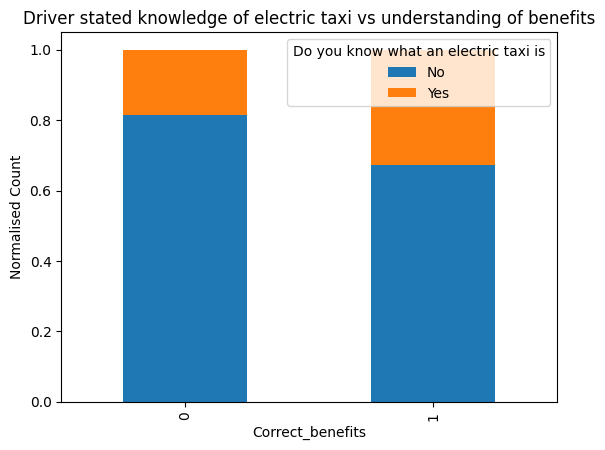

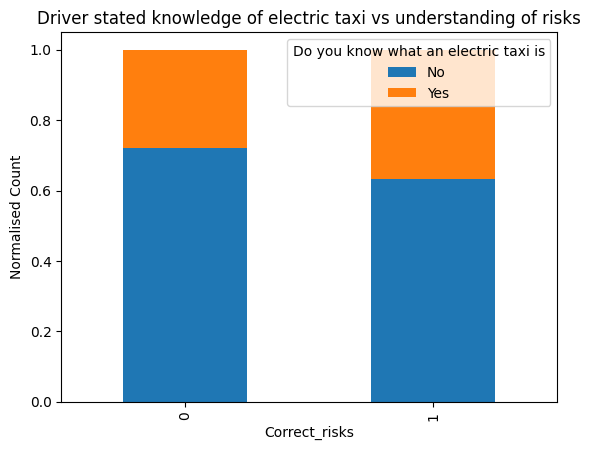

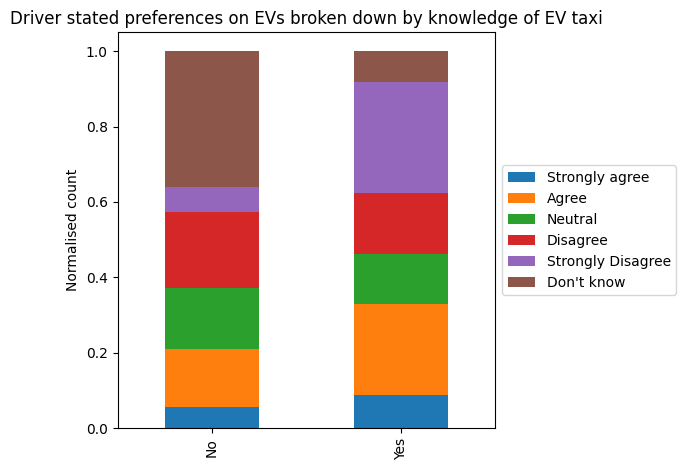

In [188]:
# we kind of want this the other way around... given that a respondent knows what an electric taxi is, what is the probability that they give a correct answer to... 
# ... the benefits of an electric taxi
# ... the risks of an electric taxi
# ... their stated preference on electric taxis
perceptions = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging an electric taxi than filling up a petrol/diesel taxi', 'More passengers', 'Faster speeds with', 'Longer range', "None of the above", "Don't know"]

benefits_correct_answers = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable']
exploded_df_driver_benefits['Correct_benefits'] = np.where(exploded_df_driver_benefits['driver_benefits_of_etaxi_exploded'].isin(benefits_correct_answers), 1, 0)
pd.crosstab(exploded_df_driver_benefits['Correct_benefits'], exploded_df_driver_benefits[driver_questions[-4]], normalize = 'index').plot(kind = 'bar', stacked = True, legend = True, ylabel = 'Normalised Count', title = 'Driver stated knowledge of electric taxi vs understanding of benefits' )
plt.show()


risks_correct_answers = ['Longer periods of charging an electric taxi than filling with diesel/petrol', 'Shorter distances between', 'Slower speeds']
exploded_df_driver_risks['Correct_risks'] = np.where(exploded_df_driver_risks['driver_risks_of_etaxi_exploded'].isin(risks_correct_answers), 1, 0)
pd.crosstab(exploded_df_driver_risks['Correct_risks'], exploded_df_driver_risks[driver_questions[-4]], normalize = 'index').plot(kind = 'bar', stacked = True, legend = True, ylabel = 'Normalised Count', title = 'Driver stated knowledge of electric taxi vs understanding of risks' )
plt.show()
# check if any answered 'don't know' to benefits AND risks


# STATED PREFS
order = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree', "Don't know"]
pd.crosstab(df[driver_questions[-4]], df[driver_perceptions[2]], normalize = 'index')[order].plot(kind = 'bar', stacked = True, legend = True, ylabel = 'Count', title = 'Driver stated preferences on EVs broken down by knowledge of EV taxi')
plt.xlabel('')
plt.ylabel('Normalised count')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
#plt.savefig("figures/drivers_knowledge_of_e_taxi_by_stated_prefs.png")
plt.show()

# test if the means between the two groups is significantly different for understanding of benefits and risks and knowledge of e-taxi
exploded_df_driver_benefits.groupby(driver_questions[-4])['Correct_benefits'].mean()
# t-test
t_test = ttest_ind(exploded_df_driver_benefits[exploded_df_driver_benefits[driver_questions[-4]] == 'Yes']['Correct_benefits'], exploded_df_driver_benefits[exploded_df_driver_benefits[driver_questions[-4]] == 'No']['Correct_benefits'])
t_test
t_test = ttest_ind(exploded_df_driver_risks[exploded_df_driver_risks[driver_questions[-4]] == 'Yes']['Correct_risks'], exploded_df_driver_risks[exploded_df_driver_risks[driver_questions[-4]] == 'No']['Correct_risks'])
t_test

print(pd.crosstab( exploded_df_driver_benefits[driver_questions[-4]], exploded_df_driver_benefits['Correct_benefits'],normalize = 'index').to_latex())
#print(pd.crosstab(exploded_df_driver_risks[driver_questions[-4]], exploded_df_driver_risks['Correct_risks'], normalize = 'index').to_latex())

In [ ]:
df['ev_prefs_index'] = df[driver_perceptions[2]].map({'Strongly agree': 1, 'Agree': 1, 'Neutral': 0, 'Disagree': -1, 'Strongly Disagree': -1})

print(pd.crosstab(df[driver_questions[-4]], df['ev_prefs_index'], normalize = 'index').to_latex())

Logistic regression with binary target variable of agree that taxi would be better or not and predictor feature of do you know what electric taxi is

In [293]:
df['ev_prefs_index'] = df[driver_perceptions[2]].map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, 'Disagree': 2, 'Strongly Disagree': 1})

df_clean = df.dropna(subset = ['ev_prefs_index', driver_questions[-4]])

df_clean['ev_prefs_index'] = df_clean['ev_prefs_index'].astype('int')

# Convert driver_questions[-4] into dummy variables
dummy = pd.get_dummies(df_clean[driver_questions[-4]], drop_first=True)

# Concatenate the dummy variables with the original dataframe
df_clean = pd.concat([df_clean, dummy], axis=1)

# Recode the target variable to be 1 if the response is 4 or 5 and 0 otherwise
df_clean['binary_ev_prefs_index'] = df_clean['ev_prefs_index'].apply(lambda x: 1 if x >= 4 else 0)

# Create a logistic regression model with the dummy variables as the independent variables and the new binary target variable as the dependent variable
logit_model = sm.Logit(df_clean['binary_ev_prefs_index'], df_clean[dummy.columns])

# Fit the model and print the summary
logit_result = logit_model.fit()
print(logit_result.summary())

# Suppose log odds is a vector of log odds values
log_odds = np.array(logit_result.params.values)

# Convert log odds to probabilities
probabilities = 1 / (1 + np.exp(-log_odds))

print(probabilities, np.exp(log_odds))



/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_13613/1801643381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ev_prefs_index'] = df_clean['ev_prefs_index'].astype('int')
/Users/Orie4416/.local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.456613
         Iterations: 35


PerfectSeparationError: Perfect separation detected, results not available

In [267]:
# Extract the parameter estimates and their standard errors from the logit_result object
params = logit_result.params
cov_matrix = logit_result.cov_params()

# Calculate the standard error of the difference between the two coefficients
se_diff = np.sqrt(params['No']**2 * cov_matrix.loc['No','No'] + params['Yes']**2 * cov_matrix.loc['Yes','Yes'] - 2 * params['No'] * params['Yes'] * cov_matrix.loc['No','Yes'])

# Calculate the Wald statistic and p-value for the difference between the coefficients
wald_stat = (params['No'] - params['Yes']) / se_diff
p_val = 2 * (1 - stats.norm.cdf(abs(wald_stat)))

print("Wald statistic:", wald_stat)
print("P-value:", p_val)


Wald statistic: 3.6959332306506307
P-value: 0.0002190805484825198


Ordered logistic regression of knowledge of electric taxi on stated preferences for electric taxi

In [246]:
cats = CategoricalDtype(categories = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree'], ordered = True)
df['ev_prefs_index'] = df[driver_perceptions[2]].astype(cats)
#df['education_index'] = df[education[0]].map({'No Schooling': 1, 'Grade 2 (previously Sub A / class 2)': 2, 'Grade 3 (Std. 1)': 3, 'Grade 4 (Std. 2)': 4,
                                                 # 'Grade 5 (Std. 3)': 5, 'Grade 6 (Std. 4)': 6, 'Grade 7 (Std. 5)': 7, 'Grade 8 (Std. 6 / Form 1)': 8,
                                                 # 'Grade 9 (Std. 7 / Form 2)': 9, 'Grade 10 (Std. 8 / Form 3)': 10, 'Grade 11 (Std. 9 / Form 4)': 11,
                                                #  'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)': 12})
#one hot encoding on knowledge of ev taxi (driver_perceptions[-4])

df_clean = df.dropna(subset = ['ev_prefs_index', driver_questions[-4]])
#drop where ev prefs is don't know
#df_clean = df_clean[df_clean['ev_prefs_index'] != 0]

# Convert driver_questions[-4] into dummy variables
dummy = pd.get_dummies(df_clean[driver_questions[-4]])

# Concatenate the dummy variables with the original dataframe
df_clean = pd.concat([df_clean, dummy], axis=1)

# Fit an ordinal logistic regression model
ordinal_model = sm.discrete.discrete_model.MNLogit(df_clean['ev_prefs_index'], df_clean[dummy.columns])

ordinal_result = ordinal_model.fit()

# Print the summary of the model
ordinal_result.summary()

Optimization terminated successfully.
         Current function value: 1.510092
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:         ev_prefs_index   No. Observations:                 3370
Model:                        MNLogit   Df Residuals:                     3362
Method:                           MLE   Df Model:                            4
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                 0.02782
Time:                        16:11:13   Log-Likelihood:                -5089.0
converged:                       True   LL-Null:                       -5234.6
Covariance Type:            nonrobust   LLR p-value:                 8.371e-62
====================================================================================================
            ev_prefs_index=Agree       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
No                                   1.0219      0.084     12.205      0.000       0.858       1.186
Yes                                  1.0165      0.111      9.136      0.000       0.798       1.235
----------------------------------------------------------------------------------------------------
ev_prefs_index=Neutral       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
No                         1.0619      0.083     12.749      0.000       0.899       1.225
Yes                        0.4055      0.123      3.294      0.001       0.164       0.647
------------------------------------------------------------------------------------------
ev_prefs_index=Disagree       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
No                          1.2804      0.081     15.775      0.000       1.121       1.439
Yes                         0.6176      0.118      5.221      0.000       0.386       0.849
-------------------------------------------------------------------------------------------
ev_prefs_index=Strongly Disagree       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
No                                   0.1615      0.098      1.653      0.098      -0.030       0.353
Yes                                  1.2049      0.109     11.084      0.000       0.992       1.418
====================================================================================================
"""

### Owner vs Driver/Owner perceptions of costs

In [ ]:
owner_op_cost_perceptions = df[owner_perceptions[-3]].value_counts(normalize = True)
owner_driver_op_costs_perceptions = df[owner_driver_perceptions[-3]].value_counts(normalize = True)
op_colors = ['red', 'orange', 'yellow', 'pink']

owner_purchase_cost_perceptions = df[owner_perceptions[-2]].value_counts(normalize = True)
owner_driver_purchase_costs_perceptions = df[owner_driver_perceptions[-2]].value_counts(normalize = True)
purchase_colors = ['red', 'orange', 'yellow', 'pink']

owner_service_cost_perceptions = df[owner_perceptions[-1]].value_counts(normalize = True)
owner_driver_service_costs_perceptions = df[owner_driver_perceptions[-1]].value_counts(normalize = True)
service_colors = ['red', 'orange', 'yellow', 'pink']

reload(taxi_survey)
taxi_survey.plot_cost_perception_comparison(owner_op_cost_perceptions, owner_driver_op_costs_perceptions, op_colors, cost_type = 'Operational', question = 'Which one would cost mor to run the taxi per day?')
taxi_survey.plot_cost_perception_comparison(owner_purchase_cost_perceptions, owner_driver_purchase_costs_perceptions, purchase_colors, cost_type = 'Purchase', question = 'Which one would cost more to buy?')
taxi_survey.plot_cost_perception_comparison(owner_service_cost_perceptions, owner_driver_service_costs_perceptions, service_colors, cost_type = 'Service', question = 'Which one would have more service costs?')


### Concern for climate change 

In [ ]:
pd.crosstab( driver_owner_user, climate_concern, normalize = 'index').plot(kind = 'bar', stacked = True)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')

Comparison of d,o,u dummy vars on concern for climate change (boxplot, regressions, ANOVA)

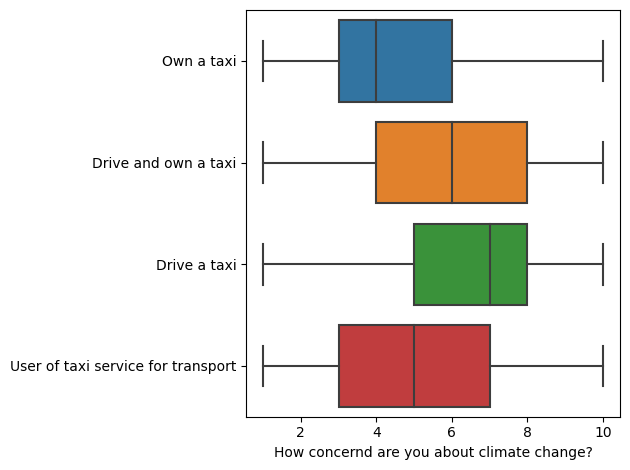

In [313]:

boxplot_df = pd.concat([climate_concern, driver_owner_user], axis = 1)
##f_melt = pd.melt(reg_df.reset_index(), id_vars = ['How concernd are you about climate change?'], value_vars = reg_df.columns[1:])
#df_melt.columns = ['Concern for climate change', 'Status', 'Value']
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df)
plt.ylabel('')
plt.tight_layout()
plt.savefig('figures/respondent_type_vs_concern.png')
plt.show()

In [ ]:


cat_concern = CategoricalDtype(categories =[1,2,3,4,5,6,7,8,9,10], ordered = True)
climate_concern_cats = climate_concern.astype(cat_concern)
climate_concern_cats.dtype

reg_df = pd.concat([climate_concern, pd.get_dummies(driver_owner_user)], axis = 1)
reg_df.dropna(inplace =True)
reg_df.columns = ['Concern', 'Drive', 'DriveOwn', 'Own', 'Use']
#from statsmodels.miscmodels.ordinal_model import OrderedModel
#mod_prob = OrderedModel(probit_df[probit_df.columns[0]], probit_df[probit_df.columns[1]], distr = 'probit')
# create the regression model
#model = sm.OLS(reg_df[reg_df.columns[0]], reg_df[['Drive a taxi', 'Drive and own a taxi', 'Own a taxi', 'User of taxi service for transport']])
model = ols('Concern ~ Drive + DriveOwn + Own + Use', data = reg_df).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
# fit the model
#results = model.fit()

# print the summary of the regression results
print(anova_table)
t_test = model.t_test("Own = Use")
print(t_test)


ttest = ttest_ind(reg_df[reg_df['Own'] == 1]['Concern'], reg_df[reg_df['Drive'] == 1]['Concern'])
print(ttest)
ttest = ttest_ind(reg_df[reg_df['DriveOwn'] == 1]['Concern'], reg_df[reg_df['Drive'] == 1]['Concern'])
print(ttest)
ttest = ttest_ind(reg_df[reg_df['Own'] == 1]['Concern'], reg_df[reg_df['DriveOwn'] == 1]['Concern'])
print(ttest)


### Risk appetite vs perception of EV risks

In [ ]:
pd.crosstab(driver_owner_user, personal_risk_taker, normalize = 'index').plot(kind = 'bar', stacked = True, title = "You describe yourself as someone who often takes risk")
plt.legend(bbox_to_anchor = (1.0,0.5), loc = 'center left')
plt.ylabel("%")
plt.xlabel('')
plt.tight_layout()
plt.savefig('figures/respondent_type_vs_risk_appetite.png')
plt.show()

### Length of ownership

In [325]:
exploded_df_driver[driver_questions[0]].value_counts()

4 to 8 yeras        2764
8 to 12 years       2149
1 to 4 years        1478
12 to 16 years      1193
16 to 20 years       522
20 to 24 years       171
Less than 1 year     164
24 to 28 years        84
28 to 32 years        19
32 years or more      17
Name: How long have you been a taxi driver?, dtype: int64

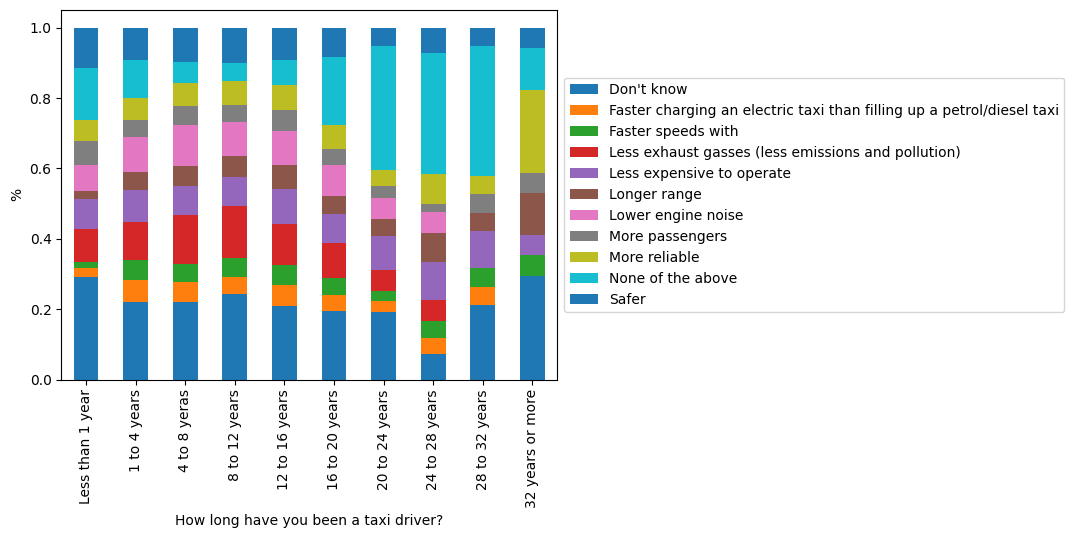

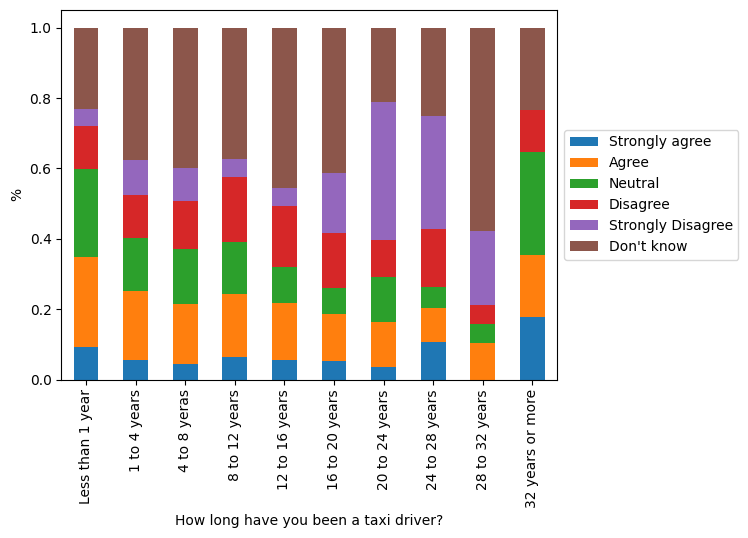

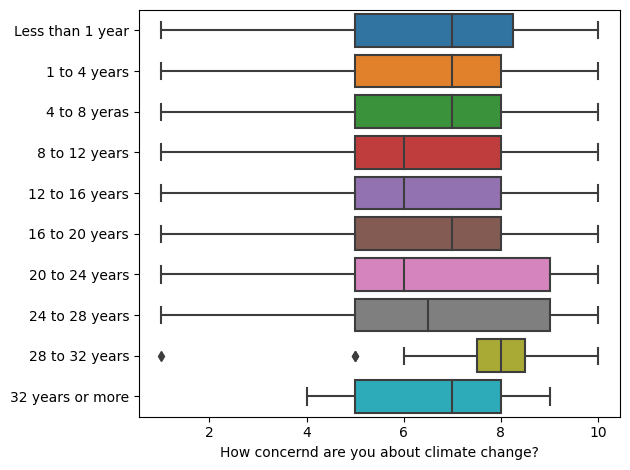

In [335]:
# Driver perceptions
df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
exploded_df_driver = df.explode('driver_benefits_of_etaxi_exploded')
exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_benefits_of_etaxi_exploded'].notnull())]

order_length = ['Less than 1 year', '1 to 4 years', '4 to 8 yeras', '8 to 12 years', '12 to 16 years', '16 to 20 years', '20 to 24 years', '24 to 28 years', '28 to 32 years', '32 years or more']
pd.crosstab(exploded_df_driver[driver_questions[0]], exploded_df_driver['driver_benefits_of_etaxi_exploded'], normalize = 'index').reindex(order_length).plot(kind = 'bar', stacked = True)
plt.legend(bbox_to_anchor = (1.0,0.5), loc = 'center left')
plt.ylabel('%')

plt.savefig('figures/length_owned_vs_benefits_of_etaxi.png')
plt.show()

order_prefs = [ 'Strongly agree', 'Agree', 'Neutral' , 'Disagree', 'Strongly Disagree', "Don't know"]

pd.crosstab(exploded_df_driver[driver_questions[0]], exploded_df_driver[driver_perceptions[2]], normalize = 'index')[order_prefs].reindex(order_length).plot(kind = 'bar', stacked = True)
plt.legend(bbox_to_anchor = (1.0,0.5), loc = 'center left')
plt.ylabel('%')
plt.savefig('figures/length_owned_vs_prefers_taxi.png')
plt.show()

# pd.crosstab(exploded_df_driver[driver_questions[0]], exploded_df[climate_change[0]], normalize = 'index').plot(kind = 'bar', stacked = True)
# plt.legend(bbox_to_anchor = (1.0,0.5), loc = 'center left')
# plt.show()



boxplot_df = pd.concat([exploded_df_driver[climate_change[0]], exploded_df_driver[driver_questions[0]]], axis = 1)
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = order_length)
plt.ylabel('')
plt.tight_layout()
plt.savefig('figures/length_owned_vs_climate_concern.png')
plt.show()


### Income

Driver, owner, and owner/driver income distributions

Index(['How many taxis do you own?2', 'How long have you owned a taxi for?2',
       'Do you own mostly petrol or diesel taxis?2',
       'How old is your oldest vehicle?2', 'How old is your average vehicle?2',
       'How far does one of your taxis drive on an average day?2',
       'How long have you been a taxi driver?2',
       'How many days of the week do you drive a taxi2',
       'What days do you drive a taxi2',
       'On WEEKDAYS, how many hours do you drive a taxi per day?2',
       'Per WEEKDAY, how many kilometres do you drive?2',
       'On WEEKENDS, how many hours do you drive a taxi per day?2',
       'What is your approximate income per week? (in South African Rand)2',
       'How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)3',
       'What risks would an electric taxi inroduce to your operations compared to petrol/diesel taxis? (select all that apply)2',
       'Driving an electric taxi would be better for y

,owner_driver_income_per_week,owner_driver_num_taxis
1,2000.0,4.0
8,4500.0,1.0
10,4500.0,1.0
13,0.0,2.0
20,4000.0,1.0
...,...,...
435,1500.0,5.0
541,140.0,5.0
557,1400.0,8.0
575,1400.0,5.0


81


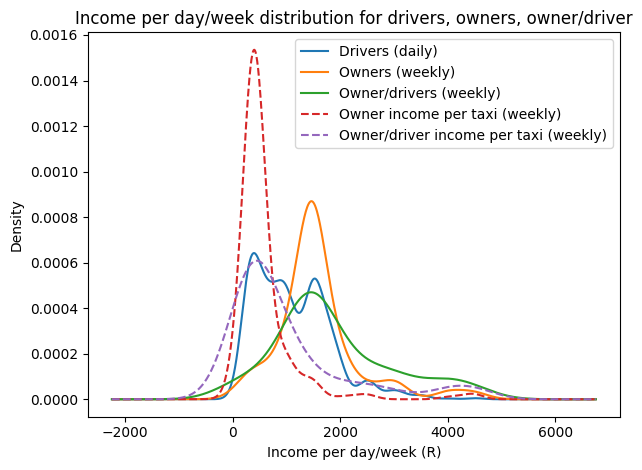

In [345]:
driver_income_cleaned = driver_income_per_day.dropna()
print(len(driver_income_per_day[driver_income_per_day > 5000]))
# Drop values over 0.5e8
driver_income_cleaned = driver_income_cleaned[driver_income_cleaned < 5000]
driver_income_cleaned.plot(kind = 'density', label = 'Drivers (daily)')
#plt.xlabel('Driver income per day (R)')
#plt.savefig('figures/driver_income_per_day_distribution.png')
#plt.show()

owner_income_cleaned = owner_income_per_week.dropna()
# Drop values over 0.5e8
owner_income_cleaned = owner_income_cleaned[(owner_income_cleaned < 5000)]
owner_income_cleaned.plot(kind = 'density', label = 'Owners (weekly)')
#plt.xlabel('Owner income per week (R)')
#plt.savefig('figures/owner_income_per_week_distribution.png')

owner_driver_income_cleaned = owner_driver_income_per_week.dropna()
# Drop values over 0.5e8
owner_driver_income_cleaned = owner_driver_income_cleaned[(owner_driver_income_cleaned < 5000)]
owner_driver_income_cleaned.plot(kind = 'density', label = 'Owner/drivers (weekly)')
#plt.xlabel('Owner income per week (R)')
#plt.savefig('figures/owner_income_per_week_distribution.png')


df_inc_per_taxi = pd.concat([owner_income_per_week, owner_num_taxis], axis = 1)
df_inc_per_taxi = df_inc_per_taxi.dropna()
df_inc_per_taxi.columns = ['owner_income_per_week', 'owner_num_taxis']
df_inc_per_taxi['owner_num_taxis'] = df_inc_per_taxi['owner_num_taxis'].astype(float)
df_inc_per_taxi = df_inc_per_taxi[df_inc_per_taxi['owner_income_per_week'] < 5000]
df_inc_per_taxi.reset_index(inplace = True)
df['owner_income_per_taxi'] = df_inc_per_taxi['owner_income_per_week'] / df_inc_per_taxi['owner_num_taxis']
df['owner_income_per_taxi'].plot(kind = 'density',label = 'Owner income per taxi (weekly)', linestyle = 'dashed')

df_od_inc_per_taxi = pd.concat([owner_driver_income_per_week, owner_driver_num_taxis], axis = 1)
df_od_inc_per_taxi = df_od_inc_per_taxi.dropna()
df_od_inc_per_taxi.columns = ['owner_driver_income_per_week', 'owner_driver_num_taxis']
df_od_inc_per_taxi['owner_driver_num_taxis'] = df_od_inc_per_taxi['owner_driver_num_taxis'].astype(float)
df_od_inc_per_taxi = df_od_inc_per_taxi[df_od_inc_per_taxi['owner_driver_income_per_week'] < 5000]
df_od_inc_per_taxi.reset_index(inplace = True)
df['owner_driver_income_per_taxi'] = df_od_inc_per_taxi['owner_driver_income_per_week'] / df_od_inc_per_taxi['owner_driver_num_taxis']
df['owner_driver_income_per_taxi'].plot(kind = 'density',label = 'Owner/driver income per taxi (weekly)', linestyle = 'dashed')

plt.ylabel('Density')
plt.xlabel('Income per day/week (R)')
plt.legend(loc = 'upper right')
plt.title("Income per day/week distribution for drivers, owners, owner/driver")
plt.tight_layout()
plt.savefig('figures/income_per_day_week_distribution.png')
plt.show()

Owner income divided by number of taxis owned

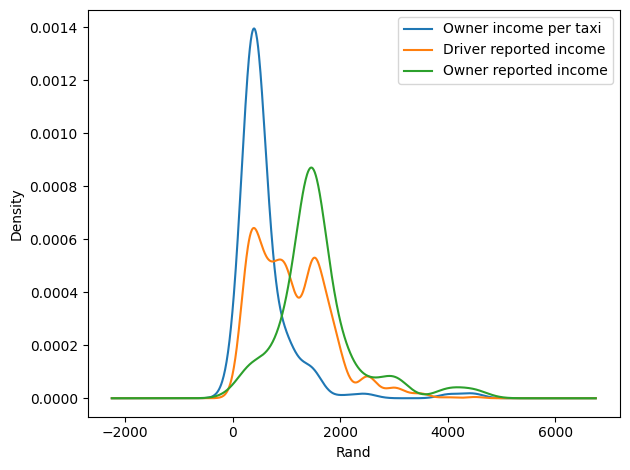

In [329]:


driver_income_cleaned.plot(kind = 'density', label = 'Driver reported income')
owner_income_cleaned.plot(kind = 'density', label = 'Owner reported income')
plt.legend(loc = 'upper right')
plt.ylabel('Density')
plt.xlabel('Rand')
plt.tight_layout()
plt.savefig('figures/income_per_taxi_distribution.png')
plt.show()

#df['owner_income_per_taxi'] = owner_income_per_week / owner_num_taxis


Income by length of time driving taxi

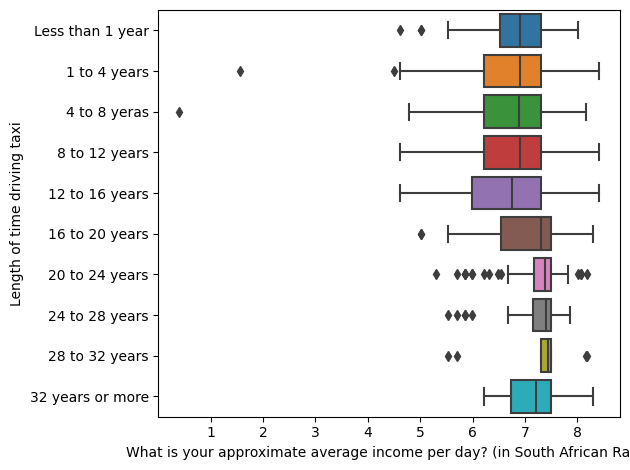

In [186]:


df_cleaned = df[(df[driver_questions[6]] < 5000) & (df[driver_questions[6]].notnull())]

order_length = ['Less than 1 year', '1 to 4 years', '4 to 8 yeras', '8 to 12 years', '12 to 16 years', '16 to 20 years', '20 to 24 years', '24 to 28 years', '28 to 32 years', '32 years or more']
boxplot_df = pd.concat([df_cleaned[driver_questions[6]], df_cleaned[driver_questions[0]]], axis = 1)
##f_melt = pd.melt(reg_df.reset_index(), id_vars = ['How concernd are you about climate change?'], value_vars = reg_df.columns[1:])
#df_melt.columns = ['Concern for climate change', 'Status', 'Value']
boxplot_df[boxplot_df.columns[0]] = np.log(boxplot_df[boxplot_df.columns[0]])
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = order_length)
plt.ylabel('Length of time driving taxi')
plt.tight_layout()
plt.savefig('figures/length_driving_vs_income.png')
plt.show()

Income by knowledge of e-taxis

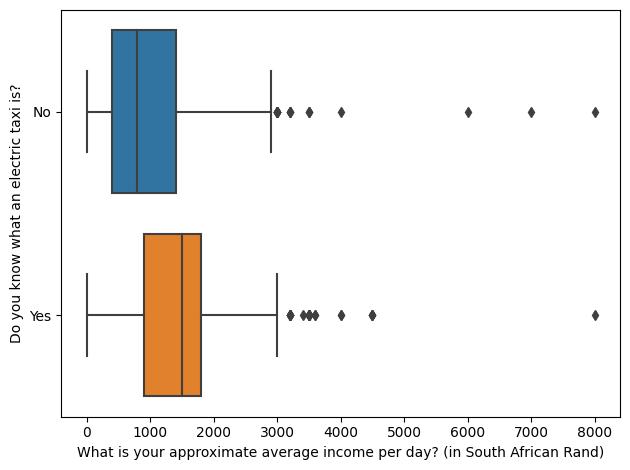

In [188]:

df_cleaned = df[(df[driver_questions[6]] < 10000) & (df[driver_questions[6]].notnull())]

boxplot_df = pd.concat([df_cleaned[driver_questions[6]], df_cleaned[driver_questions[7]]], axis = 1)
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df)
plt.ylabel('Do you know what an electric taxi is?')
plt.tight_layout()
plt.savefig('figures/income_vs_knowledge_of_etaxi.png')
plt.show()

#t-test between the means of the two groups (yes and no)
df_cleaned.groupby(driver_questions[7]).agg({driver_questions[6]: 'mean'})

t_test = ttest_ind(df_cleaned[df_cleaned[driver_questions[7]] == 'Yes'][driver_questions[6]], df_cleaned[df_cleaned[driver_questions[7]] == 'No'][driver_questions[6]])


Income by hours worked per day, km drdiven weekly, and something else i need to check out

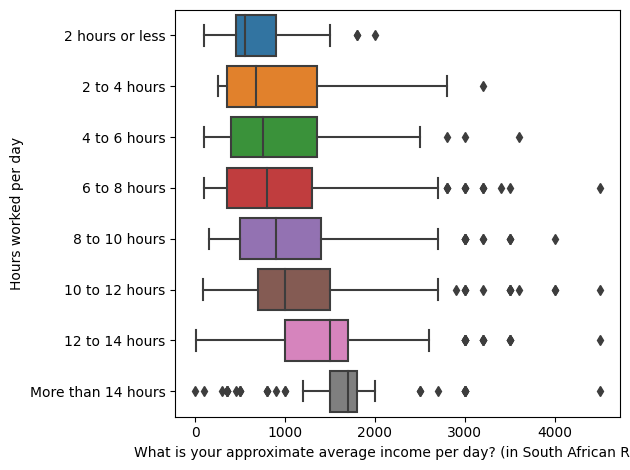

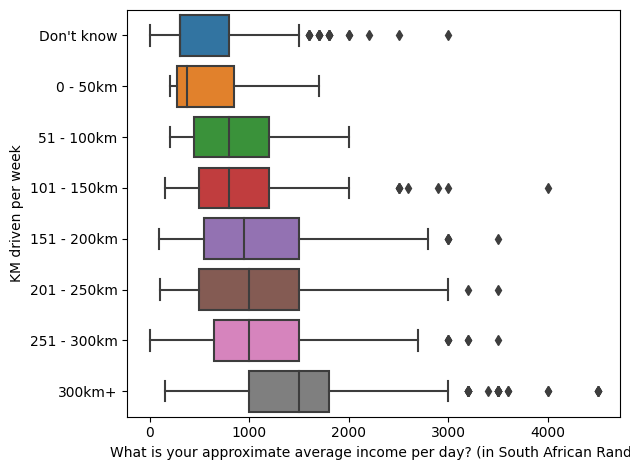

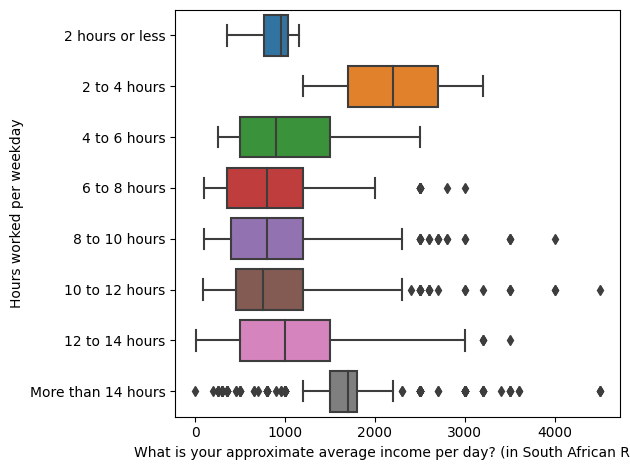

In [401]:

df_cleaned = df[(df[driver_questions[6]] < 5000) & (df[driver_questions[6]].notnull())]
order_hours = ['2 hours or less', '2 to 4 hours', '4 to 6 hours', '6 to 8 hours', '8 to 10 hours', '10 to 12 hours', '12 to 14 hours', 'More than 14 hours']
boxplot_df = pd.concat([df_cleaned[driver_questions[6]], df_cleaned[driver_questions[5]]], axis = 1)
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = order_hours)
plt.ylabel('Hours worked per day')
plt.tight_layout()
plt.savefig('figures/income_by_hours_worked_weekend.png')
plt.show()

df_cleaned = df[(df[driver_questions[6]] < 5000) & (df[driver_questions[6]].notnull())]
order_km_weekly = ["Don't know", '0 - 50km', '51 - 100km', '101 - 150km', '151 - 200km', '201 - 250km', '251 - 300km', '300km+']
boxplot_df = pd.concat([df_cleaned[driver_questions[6]], df_cleaned[driver_questions[4]]], axis = 1)
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = order_km_weekly)
plt.ylabel('KM driven per week')
plt.tight_layout()
plt.savefig('figures/income_by_km_driven.png')
plt.show()


df_cleaned = df[(df[driver_questions[6]] < 5000) & (df[driver_questions[6]].notnull())]
boxplot_df = pd.concat([df_cleaned[driver_questions[6]], df_cleaned[driver_questions[3]]], axis = 1)
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = order_hours)
plt.ylabel('Hours worked per weekday')
plt.tight_layout()
plt.savefig('figures/income_by_hours_worked_weekday.png')
plt.show()

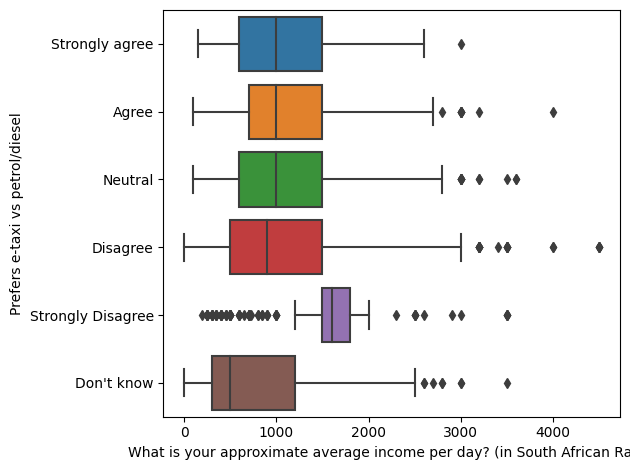

In [60]:
# Income by benefits of e-taxi
# perceptions = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging an electric taxi than filling up a petrol/diesel taxi', 'More passengers', 'Faster speeds with', 'Longer range', "None of the above", "Don't know"]
# perceptions_index = ['Less expensive operation', 'Less pollution', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging', 'More passengers', 'Faster speeds', 'Longer range', "None of the above", "Don't know"]

# df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
# exploded_df_driver = df.explode('driver_benefits_of_etaxi_exploded')
# exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_benefits_of_etaxi_exploded'].notnull())]

# exploded_df_driver_income_cleaned = exploded_df_driver[(exploded_df_driver[driver_questions[6]] < 5000) & (exploded_df_driver[driver_questions[6]].notnull())]

# boxplot_df = pd.concat([exploded_df_driver_income_cleaned[driver_questions[6]], exploded_df_driver_income_cleaned['driver_benefits_of_etaxi_exploded']], axis = 1)
# ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = perceptions) # Use perceptions instead of perceptions_index
# ax.set_yticklabels(perceptions_index)
# plt.ylabel('Benefits of e-taxi vs petrol/diesel')
# plt.tight_layout()
# plt.savefig('figures/income_by_benefits_of_etaxi.png')
# plt.show()

# Income by risks of e-taxi

# perceptions_risks = ['More expensive to operate','More pollution and emissions','More noisy', 'More dangerious', 'Less reliable', 'Longer periods of charging an electric taxi than filling with diesel/petrol', 'Fewer passengers','Slower speeds',  'Shorter distances between',   'None of the above', "Don't know"]
# perceptions_risks_index = ['More expensive operation', 'More pollution', 'Noisier', 'More dangerous', 'Less reliable','Longer charging', 'Fewer passengers', 'Slower', 'Less range', 'None of the above', "Don't know"]
# df['driver_risks_of_etaxi_exploded'] = df[driver_perceptions[1]].str.split(';')
# exploded_df_driver = df.explode('driver_risks_of_etaxi_exploded')
# exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_risks_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_risks_of_etaxi_exploded'].notnull())]

# exploded_df_driver_income_cleaned = exploded_df_driver[(exploded_df_driver[driver_questions[6]] < 5000) & (exploded_df_driver[driver_questions[6]].notnull())]

# boxplot_df = pd.concat([exploded_df_driver_income_cleaned[driver_questions[6]], exploded_df_driver_income_cleaned['driver_risks_of_etaxi_exploded']], axis = 1)
# ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = perceptions_risks) 
# ax.set_yticklabels(perceptions_risks_index)
# plt.ylabel('Risks of e-taxi vs petrol/diesel')
# plt.tight_layout()
# plt.savefig('figures/income_by_risks_of_etaxi.png')
# plt.show()

# Income by prefers e taxi

prefers_order = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree', "Don't know"]
df['driver_prefers_etaxi_exploded'] = df[driver_perceptions[2]].str.split(';')
exploded_df_driver = df.explode('driver_prefers_etaxi_exploded')
exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_prefers_etaxi_exploded'] != '') & (exploded_df_driver['driver_prefers_etaxi_exploded'].notnull())]

exploded_df_driver_income_cleaned = exploded_df_driver[(exploded_df_driver[driver_questions[6]] < 5000) & (exploded_df_driver[driver_questions[6]].notnull())]

boxplot_df = pd.concat([exploded_df_driver_income_cleaned[driver_questions[6]], exploded_df_driver_income_cleaned['driver_prefers_etaxi_exploded']], axis = 1)
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = prefers_order) 
#ax.set_yticklabels(perceptions_risks_index)
plt.ylabel('Prefers e-taxi vs petrol/diesel')
plt.tight_layout()
plt.savefig('figures/income_by_prefers_etaxi.png')
plt.show()

In [70]:
df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
df['driver_risks_of_etaxi_exploded'] =df[driver_perceptions[1]].str.split(';')
exploded_df_driver = df.explode(['driver_benefits_of_etaxi_exploded', 'driver_risks_of_etaxi_exploded'])
exploded_df_driver

ValueError: columns must have matching element counts

In [68]:
# df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
# df['driver_risks_of_etaxi_exploded'] = df[driver_perceptions[1]].str.split(';')
# exploded_df_driver = df.explode(['driver_benefits_of_etaxi_exploded')
# exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_benefits_of_etaxi_exploded'].notnull())]
# pd.crosstab(exploded_df_driver['driver_benefits_of_etaxi_exploded'], exploded_df_driver[driver_perceptions[1]]).plot(kind = 'bar', stacked = True)

# Explode the dataframe on both 'driver_benefits_of_etaxi_exploded' and 'driver_risks_of_etaxi_exploded' columns
df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
df['driver_risks_of_etaxi_exploded'] =df[driver_perceptions[1]].str.split(';')
exploded_df_driver = df.explode(['driver_benefits_of_etaxi_exploded', 'driver_risks_of_etaxi_exploded'])

# Drop null or empty string rows in either column
exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_benefits_of_etaxi_exploded'].notnull())]
exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_risks_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_risks_of_etaxi_exploded'].notnull())]

# Plot a cross tab between the two columns as a stacked bar chart
pd.crosstab(exploded_df_driver['driver_benefits_of_etaxi_exploded'], exploded_df_driver['driver_risks_of_etaxi_exploded']).plot(kind='bar', stacked=True)


ValueError: columns must have matching element counts

In [55]:
grouped = boxplot_df.groupby('driver_benefits_of_etaxi_exploded').agg(['count', 'mean']).round()
grouped = grouped.reindex(perceptions)
print(grouped.to_latex())


\begin{tabular}{lrr}
\toprule
{} & \multicolumn{2}{l}{What is your approximate average income per day? (in South African Rand)} \\
{} &                                                                    count &    mean \\
driver\_benefits\_of\_etaxi\_exploded                  &                                                                          &         \\
\midrule
Less expensive to operate                          &                                                483 &   843.0 \\
Less exhaust gasses (less emissions and pollution) &                                                584 &   773.0 \\
Lower engine noise                                 &                                                459 &   723.0 \\
Safer                                              &                                                532 &   923.0 \\
More reliable                                      &                                                398 &   758.0 \\
Faster charging an electric taxi than fil

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_70572/146214712.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(grouped.to_latex())


In [45]:
print(round(boxplot_df.groupby('driver_benefits_of_etaxi_exploded').describe()).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} & \multicolumn{8}{l}{What is your approximate average income per day? (in South African Rand)} \\
{} &                                                                    count &    mean &    std &    min &     25\% &     50\% &     75\% &     max \\
driver\_benefits\_of\_etaxi\_exploded                  &                                                                          &         &        &        &         &         &         &         \\
\midrule
Don't know                                         &                                              737.0 &  1125.0 &  686.0 &    5.0 &   500.0 &  1000.0 &  1500.0 &  3600.0 \\
Faster charging an electric taxi than filling u... &                                              301.0 &   522.0 &  537.0 &  100.0 &   300.0 &   300.0 &   400.0 &  3500.0 \\
Faster speeds with                                 &                                              297.0 &   522.0 &  542.0 &  100.0 &   300.0 &   300.0

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_70572/4116240527.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(round(boxplot_df.groupby('driver_benefits_of_etaxi_exploded').describe()).to_latex())


<Axes: xlabel='On WEEKDAYS, how many hours do you drive a taxi per day?'>

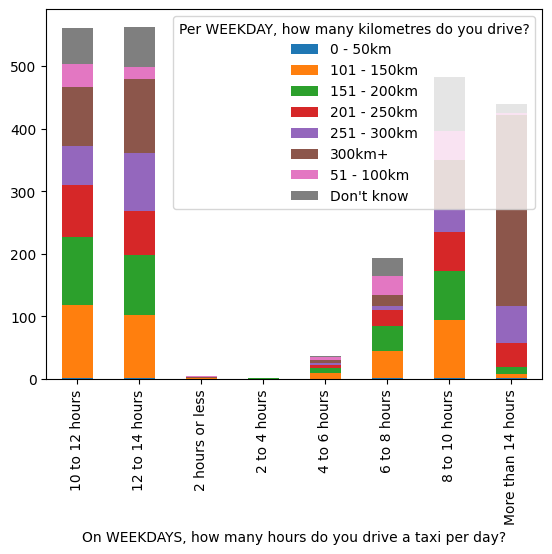

In [406]:
pd.crosstab(df_cleaned[driver_questions[3]], df_cleaned[driver_questions[4]]).plot(kind = 'bar', stacked = True)

###  Education

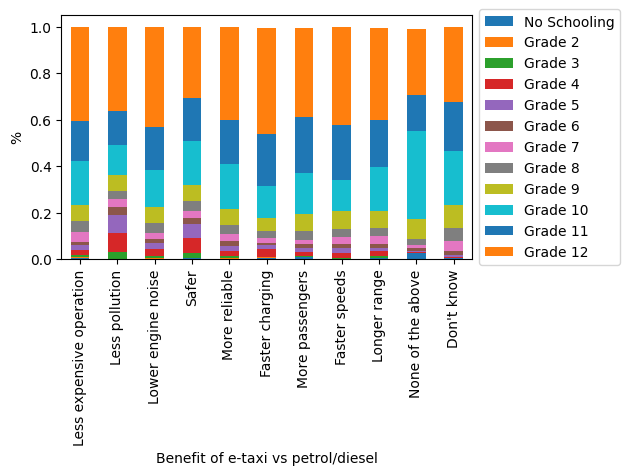

In [97]:
grade_labels = ['No Schooling', 
                'Grade 2 (previously Sub A / class 2)', 
                'Grade 3 (Std. 1)',
                'Grade 4 (Std. 2)', 
                'Grade 5 (Std. 3)',
                'Grade 6 (Std. 4)',
                'Grade 7 (Std. 5)',
                'Grade 8 (Std. 6 / Form 1)',
                'Grade 9 (Std. 7 / Form 2)',
                'Grade 10 (Std. 8 / Form 3)',
                'Grade 11 (Std. 9 / Form 4)',
                'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)']

df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
exploded_df_driver = df.explode('driver_benefits_of_etaxi_exploded')
perceptions = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging an electric taxi than filling up a petrol/diesel taxi', 'More passengers', 'Faster speeds with', 'Longer range', "None of the above", "Don't know"]
perceptions_index = ['Less expensive operation', 'Less pollution', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging', 'More passengers', 'Faster speeds', 'Longer range', "None of the above", "Don't know"]

exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_benefits_of_etaxi_exploded'].notnull())]
crosstab_df = pd.crosstab(exploded_df_driver['driver_benefits_of_etaxi_exploded'], exploded_df_driver[education[0]], normalize='index')
crosstab_df = crosstab_df.reindex(perceptions)
ax = crosstab_df[grade_labels].plot(kind='bar', stacked=True)

# Set x tick labels
ax.set_xticklabels(perceptions_index)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), labels = ['No Schooling', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12'])
plt.xlabel('Benefit of e-taxi vs petrol/diesel')
plt.ylabel('%')
plt.tight_layout()
plt.savefig('figures/education_by_benefits.png')
plt.show()

#df['driver_risks_of_etaxi_exploded'] =df[driver_perceptions[1]].str.split(';')

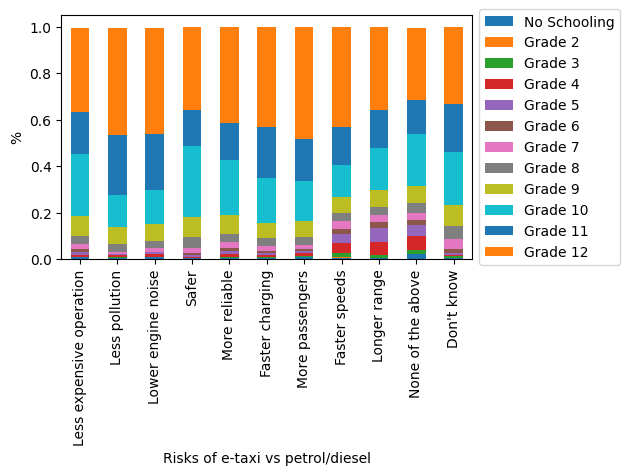

In [103]:
df['driver_risks_of_etaxi_exploded'] = df[driver_perceptions[1]].str.split(';')
exploded_df_driver = df.explode('driver_risks_of_etaxi_exploded')

perceptions_risks = ['More expensive to operate','More pollution and emissions','More noisy', 'More dangerious', 'Less reliable', 'Longer periods of charging an electric taxi than filling with diesel/petrol', 'Fewer passengers','Slower speeds',  'Shorter distances between',   'None of the above', "Don't know"]
perceptions_risks_index = ['More expensive operation', 'More pollution', 'Noisier', 'More dangerous', 'Less reliable','Longer charging', 'Fewer passengers', 'Slower', 'Less range', 'None of the above', "Don't know"]

exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_risks_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_risks_of_etaxi_exploded'].notnull())]
crosstab_df = pd.crosstab(exploded_df_driver['driver_risks_of_etaxi_exploded'], exploded_df_driver[education[0]], normalize='index')
crosstab_df = crosstab_df.reindex(perceptions_risks)
ax = crosstab_df[grade_labels].plot(kind='bar', stacked=True)

# Set x tick labels
ax.set_xticklabels(perceptions_index)
order_grades = ['No Schooling', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12']
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), labels = order_grades)
plt.xlabel('Risks of e-taxi vs petrol/diesel')
plt.ylabel('%')
plt.tight_layout()
plt.savefig('figures/education_by_risks.png')
plt.show()

In [100]:
education

Index(['What is the highest level of schooling have you succesfully completed or passed?',
       'Have you completed ANY tertiary education?',
       'What education have you received after school?',
       'What is the highest level of tertiary education you have succesfully completed?'],
      dtype='object')

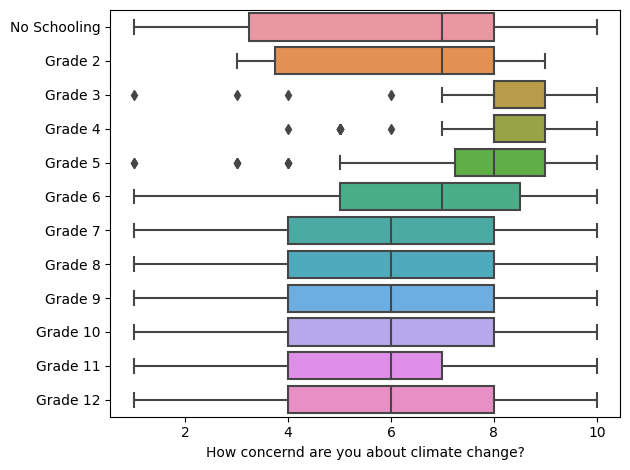

In [105]:
# Edcuation vs risk appetite
# Education vs climate

boxplot_df = pd.concat([climate_concern, df[education[0]]], axis = 1)
##f_melt = pd.melt(reg_df.reset_index(), id_vars = ['How concernd are you about climate change?'], value_vars = reg_df.columns[1:])
#df_melt.columns = ['Concern for climate change', 'Status', 'Value']
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = grade_labels)
ax.set_yticklabels(order_grades)
plt.ylabel('')
plt.tight_layout()
plt.savefig('figures/education_vs_concern.png')
plt.show()

In [157]:

# Concatenate the data frames
boxplot_df = pd.concat([climate_concern,
                        df[education[0]].replace({'No Schooling': 1, 'Grade 2 (previously Sub A / class 2)': 2, 'Grade 3 (Std. 1)': 3, 'Grade 4 (Std. 2)': 4,
                                                  'Grade 5 (Std. 3)': 5, 'Grade 6 (Std. 4)': 6, 'Grade 7 (Std. 5)': 7, 'Grade 8 (Std. 6 / Form 1)': 8,
                                                  'Grade 9 (Std. 7 / Form 2)': 9, 'Grade 10 (Std. 8 / Form 3)': 10, 'Grade 11 (Std. 9 / Form 4)': 11,
                                                  'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)': 12})],
                        axis=1)

boxplot_df.dropna(inplace = True)
boxplot_df.rename(columns = {"How concernd are you about climate change?":"Climate_Concern", boxplot_df.columns[1]: "Education"}, inplace = True)
boxplot_df = boxplot_df[boxplot_df['Education'] != "Don't know"]
boxplot_df.reset_index(inplace = True)
# Fit the linear regression model
model = smf.ols('Climate_Concern ~ Education', data=boxplot_df).fit()

# Print the summary of the linear regression results
print(model.summary().to_latex())


AttributeError: 'Summary' object has no attribute 'to_latex'

In [179]:
#effect of education on risk appetite

risk_indexed_df = pd.concat([personal_risk_taker.replace({'Strongly agree': 2, 'Agree': 1, 'Neutral': 0, 'Disagree': -1, 'Strongly disagree': 2}),
                        df[education[0]].replace({'No Schooling': 1, 'Grade 2 (previously Sub A / class 2)': 2, 'Grade 3 (Std. 1)': 3, 'Grade 4 (Std. 2)': 4,
                                                  'Grade 5 (Std. 3)': 5, 'Grade 6 (Std. 4)': 6, 'Grade 7 (Std. 5)': 7, 'Grade 8 (Std. 6 / Form 1)': 8,
                                                  'Grade 9 (Std. 7 / Form 2)': 9, 'Grade 10 (Std. 8 / Form 3)': 10, 'Grade 11 (Std. 9 / Form 4)': 11,
                                                  'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)': 12})], axis = 1)
risk_indexed_df.dropna(inplace = True)
risk_indexed_df.rename(columns = {risk_indexed_df.columns[0]:"Risk", risk_indexed_df.columns[1]: "Education"}, inplace = True)
risk_indexed_df.reset_index(inplace = True)
risk_indexed_df = risk_indexed_df[risk_indexed_df['Education'] != "Don't know"]
risk_indexed_df['Education'] = risk_indexed_df['Education'].astype(int)
model = smf.ols('Risk ~ Education', data=risk_indexed_df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Risk   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0003438
Date:                Thu, 09 Mar 2023   Prob (F-statistic):              0.985
Time:                        14:55:20   Log-Likelihood:                -6960.8
No. Observations:                5289   AIC:                         1.393e+04
Df Residuals:                    5287   BIC:                         1.394e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6462      0.056     11.445      0.0

In [168]:
risk_indexed_df

0      1.0
1      0.0
2      0.0
3      1.0
4      NaN
      ... 
698     11
699     10
700     10
701     11
702     12
Length: 11406, dtype: object

### Driving distance

In [146]:
order = ['0 - 50km', '51 - 100km', '101 - 150km', '151 - 200km', '201 - 250km', '251 - 300km', '300km+', "Don't know"]
driver_km_per_weekday.value_counts().reindex(order)
owner_km_per_day.value_counts().index
owner_km_dict
owner_driver_km_per_weekday 

NameError: name 'owner_driver_km_per_weekday' is not defined

In [153]:
owner_driver_km_per_weekday = df[owner_driver_questions[10]]
#owner_driver_questions[11]
#owner_driver_km_per_weekday

0         NaN
1      300km+
2         NaN
3         NaN
4         NaN
        ...  
698       NaN
699       NaN
700       NaN
701       NaN
702       NaN
Name: Per WEEKDAY, how many kilometres do you drive?2, Length: 5703, dtype: object

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_13613/709477699.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


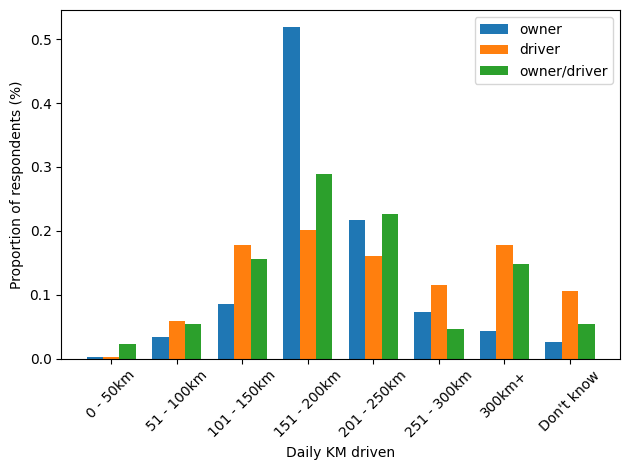

In [155]:
#plot grouped bar chart with owner and driver estimations of daily KM driven
# x = driver_km_per_weekday.value_counts()
# x.rename(index = {'300km+': '300km +'}, inplace = True)
# grouped_km_df = pd.concat([x, owner_km_per_day.value_counts()], axis = 1)
# order = ['0-50km', '50-100km', '101-150km', '150-200km', '201-250km', '250-300km', '300km+', "Don't know"]
width= 0.25
multiplier = 0
# grouped_km_dict = grouped_km_df.to_dict()
order = ['0 - 50km', '51 - 100km', '101 - 150km', '151 - 200km', '201 - 250km', '251 - 300km', '300km+', "Don't know"]
order2 = ['0 - 50km', '51 - 100km', '101 - 150km', '151 - 200km', '201 - 250km', '251 - 300km', '300km +', "Don't know"]

owner_km_dict = owner_km_per_day.value_counts().reindex(order2).to_dict()
driver_km_dict = driver_km_per_weekday.value_counts().reindex(order).to_dict()
owner_driver_km_dict = owner_driver_km_per_weekday.value_counts().reindex(order).to_dict()

km_dict = {"owner": [val/sum(list(owner_km_dict.values())) for val in list(owner_km_dict.values())], "driver": [val/sum(list(driver_km_dict.values())) for val in list(driver_km_dict.values())], 'owner/driver': [val/sum(list(owner_driver_km_dict.values())) for val in list(owner_driver_km_dict.values())]}


df[owner_driver_questions[10]].value_counts()


x = np.arange(len(order))
fig, ax = plt.subplots(layout = 'constrained')
for respondent, response_counts in km_dict.items():
    offset= width * multiplier
    #rects = ax.bar(distance, count/owner_km_per_day.value_counts().sum(), width, label = respondent)
    rects = ax.bar(x + offset, response_counts, width, label = respondent)
    #ax.bar_label(rects, padding = 3)
    multiplier += 1
    
ax.set_ylabel('Proportion of respondents (%)')
ax.set_xlabel('Daily KM driven')
ax.set_xticks(x + width, order, rotation = 45)
ax.legend()
plt.tight_layout()
plt.savefig('figures/daily_km_driven.png')

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_13613/941685946.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order , rotation=45)


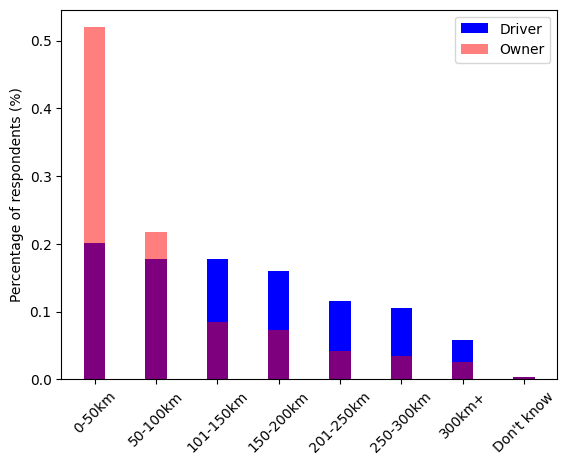

In [60]:
#plot grouped bar chart with owner and driver estimations of daily KM driven
x = driver_km_per_weekday.value_counts()
x.rename(index = {'300km+': '300km +'}, inplace = True)
grouped_km_df = pd.concat([x, owner_km_per_day.value_counts()], axis = 1)
order = ['0 - 50km', '50 - 100km', '101 - 150km', '150 - 200km', '201 - 250km', '250 - 300km', '300km+', "Don't know"]
width= 0.35
multiplier = 0
grouped_km_dict = groupoed_km_df.to_dict()

fig, ax = plt.subplots(layout = 'constrained')
for 
ax.bar(order, driver_km_per_weekday.value_counts().values/driver_km_per_weekday.value_counts().values.sum(), width, color='blue', label='Driver')
ax.bar(order, owner_km_per_day.value_counts().values/owner_km_per_day.value_counts().values.sum(), width, color='red', label='Owner', alpha = 0.5)

ax.set_xticklabels(order , rotation=45)
ax.set_ylabel('Percentage of respondents (%)')
ax.legend()

plt.show()


thnk about the barriers to ev adoption 

# <font color = 'orange'> ToDO: Effect of risk on perception of risks, benefits, and stated preferences <FONT>

In [ ]:
pd.crosstab(exploded_df_driver[climate], exploded_df_driver['driver_benefits_of_etaxi_exploded'], normalize = 'index').plot(kind = 'bar', stacked = True)
plt.legend(bbox_to_anchor = (1.0,0.5), loc = 'center left')
plt.show()

# Explore taxi DOU perceptions